# Exploratory Data Analysis on the Walmart Dataset

## import required lib


In [1]:
!pip install ipywidgets

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [2]:
from tqdm.notebook import tqdm as tqdm

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
import matplotlib.pyplot as plt

!pip install prophet
from prophet import Prophet

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1368, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

Importing plotly failed. Interactive plots will not work.


## Read data from data folder

In [4]:
filepath = './data'

In [5]:
calendar = pd.read_csv(filepath +'/calendar.csv')
sample_submission = pd.read_csv(filepath +'/sample_submission.csv')
sell_prices = pd.read_csv(filepath +'/sell_prices.csv')
sales_train_validation = pd.read_csv(filepath +'/sales_train_validation.csv')
sales_train_evaluation = pd.read_csv(filepath +'/sales_train_evaluation.csv')

In [6]:
print('calendar shape : ' , calendar.shape)
calendar.head(5)

calendar shape :  (1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [39]:
sample_submission

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
sample_submission.shape

(60980, 29)

note : weekday 1 = saturday , 7 = friday

In [7]:
print(calendar['event_type_1'].unique())
print(calendar['event_name_1'].unique())
print(calendar['event_type_2'].unique())
print(calendar['event_name_2'].unique())

[nan 'Sporting' 'Cultural' 'National' 'Religious']
[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
[nan 'Cultural' 'Religious']
[nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]


In [8]:
print('sales_train_validation_shape : ' , sales_train_validation.shape)
sales_train_validation.head(5)

sales_train_validation_shape :  (30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [9]:
print('sales_train_evaluation_shape : ' , sales_train_evaluation.shape)
sales_train_evaluation.head(5)

sales_train_evaluation_shape :  (30490, 1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### forecast sales for 28 forecast days. The sample submission has the following format:

In [10]:
print('sample_submission_shape : ' , sample_submission.shape)
sample_submission.head(5)

sample_submission_shape :  (60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#find what inside sample_submission
print(sample_submission['id'].value_counts())
print('\n')
print(sample_submission[sample_submission.id.str.contains("evaluation")].value_counts())

HOBBIES_2_101_TX_1_evaluation      1
HOBBIES_1_005_TX_1_evaluation      1
FOODS_1_073_WI_2_evaluation        1
FOODS_3_439_WI_2_validation        1
FOODS_2_349_CA_1_evaluation        1
                                  ..
HOUSEHOLD_2_337_CA_3_evaluation    1
HOUSEHOLD_2_438_CA_4_evaluation    1
FOODS_3_212_TX_2_validation        1
HOUSEHOLD_2_212_CA_4_validation    1
FOODS_2_061_CA_4_validation        1
Name: id, Length: 60980, dtype: int64


id                               F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  F11  F12  F13  F14  F15  F16  F17  F18  F19  F20  F21  F22  F23  F24  F25  F26  F27  F28
FOODS_1_001_CA_1_evaluation      0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0      1
HOUSEHOLD_1_032_CA_3_evaluation  0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0      1
HOUSEHOLD_1_033_TX_1_evaluation  0   0   0   0   0   0

evaluation 30490 row and validation 30490 row with column = 29 (28 days forcasting)

## Merge Dataframe to show datastamp


In [12]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c]

In [13]:
train_sales_datestamp_df = sales_train_validation.set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'], 
                                                                    left_index=True, right_index=True,
                                                                    validate="1:1").set_index('date')

### Some chart on cat_id with datestamp

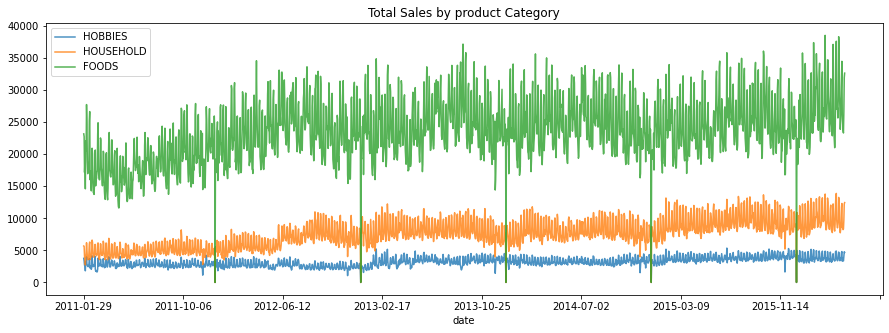

In [14]:
for i in sales_train_validation['cat_id'].unique():
    items_col = [c for c in train_sales_datestamp_df.columns if i in c]
    train_sales_datestamp_df[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by product Category')
plt.legend(sales_train_validation['cat_id'].unique())
plt.show()

In [212]:
train_sales_datestamp_df.head()

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0


In [16]:
train_sales_datestamp_df.index

Index(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02',
       '2011-02-03', '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07',
       ...
       '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
       '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24'],
      dtype='object', name='date', length=1913)

In [17]:
train_sales_datestamp_df.shape

(1913, 30490)

the last datestamp is 2016-04-24

In [57]:
train_sales_datestamp_df.iloc[-28:,5155]
#test slice dataframe

date
2016-03-28    1
2016-03-29    1
2016-03-30    1
2016-03-31    1
2016-04-01    1
2016-04-02    3
2016-04-03    0
2016-04-04    2
2016-04-05    0
2016-04-06    1
2016-04-07    1
2016-04-08    1
2016-04-09    2
2016-04-10    0
2016-04-11    1
2016-04-12    1
2016-04-13    1
2016-04-14    0
2016-04-15    1
2016-04-16    2
2016-04-17    2
2016-04-18    0
2016-04-19    2
2016-04-20    1
2016-04-21    0
2016-04-22    0
2016-04-23    1
2016-04-24    1
Name: FOODS_2_280_CA_2_validation, dtype: int64

# objective to forcasting quantities of each product id sales in total (not separate by branch and state)

### FB Prophet Forecast Using Individual Product IDs

#### prepare for FB Prophet : holidays

In [19]:
#for prophet model:
# ~ is not contain (Tilde in condition python mean It means bitwise not, inversing boolean mask)
df_event_1 = pd.DataFrame({'holiday': 'Event 1', 'ds': calendar[~calendar['event_name_1'].isna()]['date']})
df_event_2 = pd.DataFrame({'holiday': 'Event 2', 'ds': calendar[~calendar['event_name_2'].isna()]['date']})
df_snapca = pd.DataFrame({'holiday': 'snap_CA', 'ds': calendar[calendar['snap_CA'] == 1]['date']})
df_snaptx = pd.DataFrame({'holiday': 'snap_TX', 'ds': calendar[calendar['snap_TX'] == 1]['date']})
df_snapwi = pd.DataFrame({'holiday': 'snap_WI', 'ds': calendar[calendar['snap_WI'] == 1]['date']})
holidays = pd.concat((df_event_1, df_event_2, df_snapca, df_snaptx, df_snapwi))
holidays.sample(7)

,holiday,ds
160,snap_WI,2011-07-08
1224,snap_CA,2014-06-06
1226,snap_CA,2014-06-08
1107,snap_TX,2014-02-09
460,snap_CA,2012-05-03
1290,snap_WI,2014-08-11
770,snap_WI,2013-03-09


#### prep input data (one id) 

In [20]:
def single_id_ts_input(idx, threshold_date='2016-02-02'):
    
    '''
    selects and makes the timeseries adjusted for fb prophet model by adjusting names
    of columns
    
    inputs: product_id
    
    returns: time series with data specified in format for prophet
    
    '''
    datestamp = [date for date in train_sales_datestamp_df.index]
    id_series =  sales_train_validation[(sales_train_validation.id == idx )]
    item_ts = pd.DataFrame({'ds': datestamp}, index=range(len(datestamp)))
    item_ts['y'] = id_series[d_cols].T.values.reshape(-1)

    #Choosing the threshold date near to the date where prediction needs to be made 
    # threshold_date='2016-02-22'
    # threshold_date = pd.to_datetime(date) 
    filter = item_ts['ds'] > threshold_date

    single_id_ts_input = item_ts[filter][['ds', 'y']]
    
    
    return single_id_ts_input


In [21]:
#@title
# item_ts['y'] = id_series[d_cols].T.values.reshape(-1)
# len([date for date in train_sales_datestamp_df.index])
# same

# sales_train_validation[(sales_train_validation.id == 'FOODS_3_090_CA_3_validation' )].values[0].transpose()

# sales_train_validation[(sales_train_validation.id == 'FOODS_3_090_CA_3_validation' )].T.values.reshape(-1)  #### reshape(-1) is flatten

In [22]:
#@title
# exsample_id = 'FOODS_3_090_CA_3_validation'

# datestamp = [date for date in train_sales_datestamp_df.index]
# id_series =  sales_train_validation[(sales_train_validation.id == exsample_id )]
# item_ts = pd.DataFrame({'ds': datestamp}, index=range(len(datestamp)))
# item_ts['y'] = id_series[d_cols].T.values.reshape(-1)
# item_ts

In [23]:
#@title
# threshold_date='2016-02-22'
# # threshold_date = pd.to_datetime(date) 
# filter = item_ts['ds'] > threshold_date

# item_ts_filter = item_ts[filter][['ds', 'y']]
# item_ts_filter.sample(10)

#### test fit and plot fb prophet (one id)

In [24]:
def prophet_plot(data, periods=28, freq='D'):
    
    '''
    plots the fb prophet model for the data of id specified
    
    inputs: data (product id along with data for previous days), periods(predictions for 
    the next days to be made)
    
    returns: plots the immediate historic data along with forecast for the future made
    '''
    
    mod_params = { 'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 

    sales_model = Prophet(**mod_params, holidays=holidays, interval_width=0.95)
    #data['cap'] = data['y'].max() + data['y'].std() * 0.05 #incase logistic model growth used
    #fitting the model
    sales_model.fit(data)
    future = sales_model.make_future_dataframe(periods, freq)
    #future['cap'] = data['cap'].max() #incase logistic model growth used in params

    sales_forecast = sales_model.predict(future)
    print(sales_forecast[['ds', 'yhat']].tail(28))
    
    
    plt.figure(figsize=(15,3))
    #fig, ax = plt.subplots(figsize=(14,5))
    sales_model.plot(sales_forecast, xlabel='Date', ylabel='Unit Sales Behavior')
    #plt.axvline(x=sales_forecast[sales_forecast.ds == '2016-04-22']['ds'], color='r')
    #ax.axvline(threshold_date, color='g', linestyle='--', label='Prediction Onwards')
    #ax.legend(loc='upper left')
    #ax.set(title='Avg Sales of Units', ylabel='');
    plt.title("Unit Sales Trend on Each ID")
    plt.show()

    


In [58]:
sales_train_validation[(sales_train_validation.id == 'FOODS_2_280_CA_2_validation' )]

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
5155,FOODS_2_280_CA_2_validation,FOODS_2_280,FOODS_2,FOODS,CA_2,CA,0,0,0,0,...,1,2,2,0,2,1,0,0,1,1


04:35:30 - cmdstanpy - INFO - Chain [1] start processing
04:35:30 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat
82  2016-04-25  0.872718
83  2016-04-26  0.440463
84  2016-04-27  0.878999
85  2016-04-28  0.432997
86  2016-04-29  0.819259
87  2016-04-30  1.666996
88  2016-05-01  1.424371
89  2016-05-02  1.261686
90  2016-05-03  0.783674
91  2016-05-04  1.120990
92  2016-05-05  0.929213
93  2016-05-06  1.181905
94  2016-05-07  1.758818
95  2016-05-08  1.663600
96  2016-05-09  1.277503
97  2016-05-10  0.689354
98  2016-05-11  1.071252
99  2016-05-12  0.591217
100 2016-05-13  0.849608
101 2016-05-14  1.795331
102 2016-05-15  1.313499
103 2016-05-16  0.975074
104 2016-05-17  0.491834
105 2016-05-18  0.980952
106 2016-05-19  0.482944
107 2016-05-20  0.913245
108 2016-05-21  1.694509
109 2016-05-22  1.228396


<Figure size 1080x216 with 0 Axes>

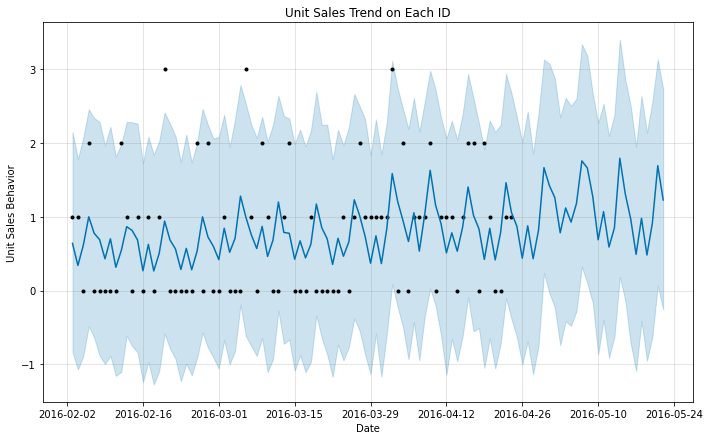

In [59]:
exsample_id = 'FOODS_2_280_CA_2_validation'
single_id1_ts = single_id_ts_input(exsample_id)
prophet_plot(single_id1_ts)

In [215]:
single_id1_ts.to_csv('single_id1_ts.csv')

## All id forcast with fb prophet

### Prophet Tuning hyperparameter tuning with grid search

In [51]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


#Note : the code was generated using the explanation at the following link
#https://www.baeldung.com/cs/mape-vs-wape-vs-wmape

def fbprophet_tuning_per_single_id(id_data, changepoint_prior_list=[0.5, 0.6, 0.7], 
                                   changepoint_range_list=[0.6, 0.7, 0.8], 
                                   n_changepoints_list=[50, 60]):
    param_grid = {  
        'changepoint_prior_scale': changepoint_prior_list,
        'changepoint_range': changepoint_range_list,
        'n_changepoints' : n_changepoints_list
    }

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    #wapes = []  # Store the RMSEs for each params here
    wmapes = []

    # Use cross validation to evaluate all parameters
    for params in all_params:
        mod = Prophet(**params).fit(id_data)  # Fit model with given params
        df_cv = cross_validation(mod, initial = '32 days', period = '3 days', horizon='28 days')
        #df_p = performance_metrics(df_cv, rolling_window=1)
        #rmses.append(df_p['rmse'].values[0])
        #wapes.append(np.sum(df_cv['yhat'] - df_cv['y']) / (np.sum(df_cv['y'])))
        weighted_coeff = (df_cv['yhat'] - df_cv['y'])/(df_cv['yhat'] - df_cv['y']).mean()
        wmapes.append(np.sum((df_cv['yhat'] - df_cv['y']) * weighted_coeff )/ np.sum(weighted_coeff*df_cv['y']) )

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['wmape'] = wmapes
    print(tuning_results)
    
fbprophet_tuning_per_single_id(single_id1_ts)

04:29:14 - cmdstanpy - INFO - Chain [1] start processing
04:29:15 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/8 [00:00<?, ?it/s]

04:29:15 - cmdstanpy - INFO - Chain [1] start processing
04:29:15 - cmdstanpy - INFO - Chain [1] done processing
04:29:16 - cmdstanpy - INFO - Chain [1] start processing
04:29:16 - cmdstanpy - INFO - Chain [1] done processing
04:29:17 - cmdstanpy - INFO - Chain [1] start processing
04:29:17 - cmdstanpy - INFO - Chain [1] done processing
04:29:17 - cmdstanpy - INFO - Chain [1] start processing
04:29:17 - cmdstanpy - INFO - Chain [1] done processing
04:29:18 - cmdstanpy - INFO - Chain [1] start processing
04:29:18 - cmdstanpy - INFO - Chain [1] done processing
04:29:18 - cmdstanpy - INFO - Chain [1] start processing
04:29:18 - cmdstanpy - INFO - Chain [1] done processing
04:29:19 - cmdstanpy - INFO - Chain [1] start processing
04:29:19 - cmdstanpy - INFO - Chain [1] done processing
04:29:19 - cmdstanpy - INFO - Chain [1] start processing
04:29:20 - cmdstanpy - INFO - Chain [1] done processing
04:29:20 - cmdstanpy - INFO - Chain [1] start processing
04:29:21 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:21 - cmdstanpy - INFO - Chain [1] start processing
04:29:21 - cmdstanpy - INFO - Chain [1] done processing
04:29:22 - cmdstanpy - INFO - Chain [1] start processing
04:29:22 - cmdstanpy - INFO - Chain [1] done processing
04:29:22 - cmdstanpy - INFO - Chain [1] start processing
04:29:23 - cmdstanpy - INFO - Chain [1] done processing
04:29:23 - cmdstanpy - INFO - Chain [1] start processing
04:29:23 - cmdstanpy - INFO - Chain [1] done processing
04:29:24 - cmdstanpy - INFO - Chain [1] start processing
04:29:24 - cmdstanpy - INFO - Chain [1] done processing
04:29:24 - cmdstanpy - INFO - Chain [1] start processing
04:29:24 - cmdstanpy - INFO - Chain [1] done processing
04:29:25 - cmdstanpy - INFO - Chain [1] start processing
04:29:25 - cmdstanpy - INFO - Chain [1] done processing
04:29:25 - cmdstanpy - INFO - Chain [1] start processing
04:29:25 - cmdstanpy - INFO - Chain [1] done processing
04:29:26 - cmdstanpy - INFO - Chain [1] start processing
04:29:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:27 - cmdstanpy - INFO - Chain [1] start processing
04:29:27 - cmdstanpy - INFO - Chain [1] done processing
04:29:27 - cmdstanpy - INFO - Chain [1] start processing
04:29:28 - cmdstanpy - INFO - Chain [1] done processing
04:29:28 - cmdstanpy - INFO - Chain [1] start processing
04:29:28 - cmdstanpy - INFO - Chain [1] done processing
04:29:29 - cmdstanpy - INFO - Chain [1] start processing
04:29:29 - cmdstanpy - INFO - Chain [1] done processing
04:29:29 - cmdstanpy - INFO - Chain [1] start processing
04:29:29 - cmdstanpy - INFO - Chain [1] done processing
04:29:30 - cmdstanpy - INFO - Chain [1] start processing
04:29:30 - cmdstanpy - INFO - Chain [1] done processing
04:29:30 - cmdstanpy - INFO - Chain [1] start processing
04:29:31 - cmdstanpy - INFO - Chain [1] done processing
04:29:31 - cmdstanpy - INFO - Chain [1] start processing
04:29:31 - cmdstanpy - INFO - Chain [1] done processing
04:29:32 - cmdstanpy - INFO - Chain [1] start processing
04:29:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:33 - cmdstanpy - INFO - Chain [1] start processing
04:29:33 - cmdstanpy - INFO - Chain [1] done processing
04:29:34 - cmdstanpy - INFO - Chain [1] start processing
04:29:34 - cmdstanpy - INFO - Chain [1] done processing
04:29:34 - cmdstanpy - INFO - Chain [1] start processing
04:29:34 - cmdstanpy - INFO - Chain [1] done processing
04:29:35 - cmdstanpy - INFO - Chain [1] start processing
04:29:35 - cmdstanpy - INFO - Chain [1] done processing
04:29:35 - cmdstanpy - INFO - Chain [1] start processing
04:29:35 - cmdstanpy - INFO - Chain [1] done processing
04:29:36 - cmdstanpy - INFO - Chain [1] start processing
04:29:36 - cmdstanpy - INFO - Chain [1] done processing
04:29:36 - cmdstanpy - INFO - Chain [1] start processing
04:29:37 - cmdstanpy - INFO - Chain [1] done processing
04:29:37 - cmdstanpy - INFO - Chain [1] start processing
04:29:37 - cmdstanpy - INFO - Chain [1] done processing
04:29:38 - cmdstanpy - INFO - Chain [1] start processing
04:29:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:39 - cmdstanpy - INFO - Chain [1] start processing
04:29:39 - cmdstanpy - INFO - Chain [1] done processing
04:29:39 - cmdstanpy - INFO - Chain [1] start processing
04:29:40 - cmdstanpy - INFO - Chain [1] done processing
04:29:40 - cmdstanpy - INFO - Chain [1] start processing
04:29:40 - cmdstanpy - INFO - Chain [1] done processing
04:29:41 - cmdstanpy - INFO - Chain [1] start processing
04:29:41 - cmdstanpy - INFO - Chain [1] done processing
04:29:41 - cmdstanpy - INFO - Chain [1] start processing
04:29:41 - cmdstanpy - INFO - Chain [1] done processing
04:29:42 - cmdstanpy - INFO - Chain [1] start processing
04:29:42 - cmdstanpy - INFO - Chain [1] done processing
04:29:43 - cmdstanpy - INFO - Chain [1] start processing
04:29:43 - cmdstanpy - INFO - Chain [1] done processing
04:29:43 - cmdstanpy - INFO - Chain [1] start processing
04:29:44 - cmdstanpy - INFO - Chain [1] done processing
04:29:44 - cmdstanpy - INFO - Chain [1] start processing
04:29:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:45 - cmdstanpy - INFO - Chain [1] start processing
04:29:46 - cmdstanpy - INFO - Chain [1] done processing
04:29:46 - cmdstanpy - INFO - Chain [1] start processing
04:29:46 - cmdstanpy - INFO - Chain [1] done processing
04:29:47 - cmdstanpy - INFO - Chain [1] start processing
04:29:47 - cmdstanpy - INFO - Chain [1] done processing
04:29:47 - cmdstanpy - INFO - Chain [1] start processing
04:29:47 - cmdstanpy - INFO - Chain [1] done processing
04:29:48 - cmdstanpy - INFO - Chain [1] start processing
04:29:48 - cmdstanpy - INFO - Chain [1] done processing
04:29:49 - cmdstanpy - INFO - Chain [1] start processing
04:29:49 - cmdstanpy - INFO - Chain [1] done processing
04:29:49 - cmdstanpy - INFO - Chain [1] start processing
04:29:49 - cmdstanpy - INFO - Chain [1] done processing
04:29:50 - cmdstanpy - INFO - Chain [1] start processing
04:29:50 - cmdstanpy - INFO - Chain [1] done processing
04:29:51 - cmdstanpy - INFO - Chain [1] start processing
04:29:52 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:52 - cmdstanpy - INFO - Chain [1] start processing
04:29:52 - cmdstanpy - INFO - Chain [1] done processing
04:29:52 - cmdstanpy - INFO - Chain [1] start processing
04:29:52 - cmdstanpy - INFO - Chain [1] done processing
04:29:53 - cmdstanpy - INFO - Chain [1] start processing
04:29:53 - cmdstanpy - INFO - Chain [1] done processing
04:29:53 - cmdstanpy - INFO - Chain [1] start processing
04:29:54 - cmdstanpy - INFO - Chain [1] done processing
04:29:54 - cmdstanpy - INFO - Chain [1] start processing
04:29:54 - cmdstanpy - INFO - Chain [1] done processing
04:29:55 - cmdstanpy - INFO - Chain [1] start processing
04:29:55 - cmdstanpy - INFO - Chain [1] done processing
04:29:55 - cmdstanpy - INFO - Chain [1] start processing
04:29:55 - cmdstanpy - INFO - Chain [1] done processing
04:29:56 - cmdstanpy - INFO - Chain [1] start processing
04:29:56 - cmdstanpy - INFO - Chain [1] done processing
04:29:56 - cmdstanpy - INFO - Chain [1] start processing
04:29:58 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:29:58 - cmdstanpy - INFO - Chain [1] start processing
04:29:58 - cmdstanpy - INFO - Chain [1] done processing
04:29:58 - cmdstanpy - INFO - Chain [1] start processing
04:29:58 - cmdstanpy - INFO - Chain [1] done processing
04:29:59 - cmdstanpy - INFO - Chain [1] start processing
04:29:59 - cmdstanpy - INFO - Chain [1] done processing
04:29:59 - cmdstanpy - INFO - Chain [1] start processing
04:30:00 - cmdstanpy - INFO - Chain [1] done processing
04:30:00 - cmdstanpy - INFO - Chain [1] start processing
04:30:00 - cmdstanpy - INFO - Chain [1] done processing
04:30:01 - cmdstanpy - INFO - Chain [1] start processing
04:30:01 - cmdstanpy - INFO - Chain [1] done processing
04:30:01 - cmdstanpy - INFO - Chain [1] start processing
04:30:01 - cmdstanpy - INFO - Chain [1] done processing
04:30:02 - cmdstanpy - INFO - Chain [1] start processing
04:30:02 - cmdstanpy - INFO - Chain [1] done processing
04:30:02 - cmdstanpy - INFO - Chain [1] start processing
04:30:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:04 - cmdstanpy - INFO - Chain [1] start processing
04:30:04 - cmdstanpy - INFO - Chain [1] done processing
04:30:04 - cmdstanpy - INFO - Chain [1] start processing
04:30:04 - cmdstanpy - INFO - Chain [1] done processing
04:30:05 - cmdstanpy - INFO - Chain [1] start processing
04:30:05 - cmdstanpy - INFO - Chain [1] done processing
04:30:05 - cmdstanpy - INFO - Chain [1] start processing
04:30:06 - cmdstanpy - INFO - Chain [1] done processing
04:30:06 - cmdstanpy - INFO - Chain [1] start processing
04:30:06 - cmdstanpy - INFO - Chain [1] done processing
04:30:07 - cmdstanpy - INFO - Chain [1] start processing
04:30:07 - cmdstanpy - INFO - Chain [1] done processing
04:30:07 - cmdstanpy - INFO - Chain [1] start processing
04:30:08 - cmdstanpy - INFO - Chain [1] done processing
04:30:08 - cmdstanpy - INFO - Chain [1] start processing
04:30:08 - cmdstanpy - INFO - Chain [1] done processing
04:30:09 - cmdstanpy - INFO - Chain [1] start processing
04:30:10 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:10 - cmdstanpy - INFO - Chain [1] start processing
04:30:10 - cmdstanpy - INFO - Chain [1] done processing
04:30:11 - cmdstanpy - INFO - Chain [1] start processing
04:30:11 - cmdstanpy - INFO - Chain [1] done processing
04:30:11 - cmdstanpy - INFO - Chain [1] start processing
04:30:12 - cmdstanpy - INFO - Chain [1] done processing
04:30:12 - cmdstanpy - INFO - Chain [1] start processing
04:30:12 - cmdstanpy - INFO - Chain [1] done processing
04:30:13 - cmdstanpy - INFO - Chain [1] start processing
04:30:13 - cmdstanpy - INFO - Chain [1] done processing
04:30:13 - cmdstanpy - INFO - Chain [1] start processing
04:30:13 - cmdstanpy - INFO - Chain [1] done processing
04:30:14 - cmdstanpy - INFO - Chain [1] start processing
04:30:14 - cmdstanpy - INFO - Chain [1] done processing
04:30:15 - cmdstanpy - INFO - Chain [1] start processing
04:30:15 - cmdstanpy - INFO - Chain [1] done processing
04:30:15 - cmdstanpy - INFO - Chain [1] start processing
04:30:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:17 - cmdstanpy - INFO - Chain [1] start processing
04:30:17 - cmdstanpy - INFO - Chain [1] done processing
04:30:17 - cmdstanpy - INFO - Chain [1] start processing
04:30:17 - cmdstanpy - INFO - Chain [1] done processing
04:30:18 - cmdstanpy - INFO - Chain [1] start processing
04:30:18 - cmdstanpy - INFO - Chain [1] done processing
04:30:18 - cmdstanpy - INFO - Chain [1] start processing
04:30:19 - cmdstanpy - INFO - Chain [1] done processing
04:30:19 - cmdstanpy - INFO - Chain [1] start processing
04:30:19 - cmdstanpy - INFO - Chain [1] done processing
04:30:20 - cmdstanpy - INFO - Chain [1] start processing
04:30:20 - cmdstanpy - INFO - Chain [1] done processing
04:30:20 - cmdstanpy - INFO - Chain [1] start processing
04:30:21 - cmdstanpy - INFO - Chain [1] done processing
04:30:21 - cmdstanpy - INFO - Chain [1] start processing
04:30:21 - cmdstanpy - INFO - Chain [1] done processing
04:30:22 - cmdstanpy - INFO - Chain [1] start processing
04:30:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:23 - cmdstanpy - INFO - Chain [1] start processing
04:30:24 - cmdstanpy - INFO - Chain [1] done processing
04:30:24 - cmdstanpy - INFO - Chain [1] start processing
04:30:24 - cmdstanpy - INFO - Chain [1] done processing
04:30:25 - cmdstanpy - INFO - Chain [1] start processing
04:30:25 - cmdstanpy - INFO - Chain [1] done processing
04:30:25 - cmdstanpy - INFO - Chain [1] start processing
04:30:25 - cmdstanpy - INFO - Chain [1] done processing
04:30:26 - cmdstanpy - INFO - Chain [1] start processing
04:30:26 - cmdstanpy - INFO - Chain [1] done processing
04:30:27 - cmdstanpy - INFO - Chain [1] start processing
04:30:27 - cmdstanpy - INFO - Chain [1] done processing
04:30:27 - cmdstanpy - INFO - Chain [1] start processing
04:30:28 - cmdstanpy - INFO - Chain [1] done processing
04:30:28 - cmdstanpy - INFO - Chain [1] start processing
04:30:28 - cmdstanpy - INFO - Chain [1] done processing
04:30:29 - cmdstanpy - INFO - Chain [1] start processing
04:30:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:30 - cmdstanpy - INFO - Chain [1] start processing
04:30:30 - cmdstanpy - INFO - Chain [1] done processing
04:30:31 - cmdstanpy - INFO - Chain [1] start processing
04:30:31 - cmdstanpy - INFO - Chain [1] done processing
04:30:31 - cmdstanpy - INFO - Chain [1] start processing
04:30:31 - cmdstanpy - INFO - Chain [1] done processing
04:30:32 - cmdstanpy - INFO - Chain [1] start processing
04:30:32 - cmdstanpy - INFO - Chain [1] done processing
04:30:32 - cmdstanpy - INFO - Chain [1] start processing
04:30:32 - cmdstanpy - INFO - Chain [1] done processing
04:30:33 - cmdstanpy - INFO - Chain [1] start processing
04:30:33 - cmdstanpy - INFO - Chain [1] done processing
04:30:33 - cmdstanpy - INFO - Chain [1] start processing
04:30:34 - cmdstanpy - INFO - Chain [1] done processing
04:30:34 - cmdstanpy - INFO - Chain [1] start processing
04:30:34 - cmdstanpy - INFO - Chain [1] done processing
04:30:35 - cmdstanpy - INFO - Chain [1] start processing
04:30:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:36 - cmdstanpy - INFO - Chain [1] start processing
04:30:36 - cmdstanpy - INFO - Chain [1] done processing
04:30:36 - cmdstanpy - INFO - Chain [1] start processing
04:30:37 - cmdstanpy - INFO - Chain [1] done processing
04:30:37 - cmdstanpy - INFO - Chain [1] start processing
04:30:37 - cmdstanpy - INFO - Chain [1] done processing
04:30:38 - cmdstanpy - INFO - Chain [1] start processing
04:30:38 - cmdstanpy - INFO - Chain [1] done processing
04:30:38 - cmdstanpy - INFO - Chain [1] start processing
04:30:38 - cmdstanpy - INFO - Chain [1] done processing
04:30:39 - cmdstanpy - INFO - Chain [1] start processing
04:30:39 - cmdstanpy - INFO - Chain [1] done processing
04:30:39 - cmdstanpy - INFO - Chain [1] start processing
04:30:40 - cmdstanpy - INFO - Chain [1] done processing
04:30:40 - cmdstanpy - INFO - Chain [1] start processing
04:30:40 - cmdstanpy - INFO - Chain [1] done processing
04:30:41 - cmdstanpy - INFO - Chain [1] start processing
04:30:41 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:42 - cmdstanpy - INFO - Chain [1] start processing
04:30:42 - cmdstanpy - INFO - Chain [1] done processing
04:30:42 - cmdstanpy - INFO - Chain [1] start processing
04:30:42 - cmdstanpy - INFO - Chain [1] done processing
04:30:43 - cmdstanpy - INFO - Chain [1] start processing
04:30:43 - cmdstanpy - INFO - Chain [1] done processing
04:30:43 - cmdstanpy - INFO - Chain [1] start processing
04:30:44 - cmdstanpy - INFO - Chain [1] done processing
04:30:44 - cmdstanpy - INFO - Chain [1] start processing
04:30:44 - cmdstanpy - INFO - Chain [1] done processing
04:30:45 - cmdstanpy - INFO - Chain [1] start processing
04:30:45 - cmdstanpy - INFO - Chain [1] done processing
04:30:45 - cmdstanpy - INFO - Chain [1] start processing
04:30:45 - cmdstanpy - INFO - Chain [1] done processing
04:30:46 - cmdstanpy - INFO - Chain [1] start processing
04:30:46 - cmdstanpy - INFO - Chain [1] done processing
04:30:47 - cmdstanpy - INFO - Chain [1] start processing
04:30:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:48 - cmdstanpy - INFO - Chain [1] start processing
04:30:48 - cmdstanpy - INFO - Chain [1] done processing
04:30:48 - cmdstanpy - INFO - Chain [1] start processing
04:30:49 - cmdstanpy - INFO - Chain [1] done processing
04:30:49 - cmdstanpy - INFO - Chain [1] start processing
04:30:49 - cmdstanpy - INFO - Chain [1] done processing
04:30:50 - cmdstanpy - INFO - Chain [1] start processing
04:30:50 - cmdstanpy - INFO - Chain [1] done processing
04:30:50 - cmdstanpy - INFO - Chain [1] start processing
04:30:50 - cmdstanpy - INFO - Chain [1] done processing
04:30:51 - cmdstanpy - INFO - Chain [1] start processing
04:30:51 - cmdstanpy - INFO - Chain [1] done processing
04:30:52 - cmdstanpy - INFO - Chain [1] start processing
04:30:52 - cmdstanpy - INFO - Chain [1] done processing
04:30:52 - cmdstanpy - INFO - Chain [1] start processing
04:30:52 - cmdstanpy - INFO - Chain [1] done processing
04:30:53 - cmdstanpy - INFO - Chain [1] start processing
04:30:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:30:54 - cmdstanpy - INFO - Chain [1] start processing
04:30:54 - cmdstanpy - INFO - Chain [1] done processing
04:30:55 - cmdstanpy - INFO - Chain [1] start processing
04:30:55 - cmdstanpy - INFO - Chain [1] done processing
04:30:55 - cmdstanpy - INFO - Chain [1] start processing
04:30:56 - cmdstanpy - INFO - Chain [1] done processing
04:30:56 - cmdstanpy - INFO - Chain [1] start processing
04:30:56 - cmdstanpy - INFO - Chain [1] done processing
04:30:57 - cmdstanpy - INFO - Chain [1] start processing
04:30:57 - cmdstanpy - INFO - Chain [1] done processing
04:30:57 - cmdstanpy - INFO - Chain [1] start processing
04:30:58 - cmdstanpy - INFO - Chain [1] done processing
04:30:58 - cmdstanpy - INFO - Chain [1] start processing
04:30:58 - cmdstanpy - INFO - Chain [1] done processing
04:30:59 - cmdstanpy - INFO - Chain [1] start processing
04:30:59 - cmdstanpy - INFO - Chain [1] done processing
04:30:59 - cmdstanpy - INFO - Chain [1] start processing
04:31:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/8 [00:00<?, ?it/s]

04:31:01 - cmdstanpy - INFO - Chain [1] start processing
04:31:01 - cmdstanpy - INFO - Chain [1] done processing
04:31:02 - cmdstanpy - INFO - Chain [1] start processing
04:31:02 - cmdstanpy - INFO - Chain [1] done processing
04:31:03 - cmdstanpy - INFO - Chain [1] start processing
04:31:03 - cmdstanpy - INFO - Chain [1] done processing
04:31:03 - cmdstanpy - INFO - Chain [1] start processing
04:31:03 - cmdstanpy - INFO - Chain [1] done processing
04:31:04 - cmdstanpy - INFO - Chain [1] start processing
04:31:04 - cmdstanpy - INFO - Chain [1] done processing
04:31:04 - cmdstanpy - INFO - Chain [1] start processing
04:31:05 - cmdstanpy - INFO - Chain [1] done processing
04:31:05 - cmdstanpy - INFO - Chain [1] start processing
04:31:05 - cmdstanpy - INFO - Chain [1] done processing
04:31:06 - cmdstanpy - INFO - Chain [1] start processing
04:31:06 - cmdstanpy - INFO - Chain [1] done processing


    changepoint_prior_scale  changepoint_range  n_changepoints      wmape
0                       0.5                0.6              50  -5.661195
1                       0.5                0.6              60  -5.661195
2                       0.5                0.7              50  -8.578265
3                       0.5                0.7              60  -8.578265
4                       0.5                0.8              50 -14.368800
5                       0.5                0.8              60 -14.368800
6                       0.6                0.6              50  -5.659114
7                       0.6                0.6              60  -5.659114
8                       0.6                0.7              50 -10.494957
9                       0.6                0.7              60 -10.494957
10                      0.6                0.8              50 -16.969686
11                      0.6                0.8              60 -16.969686
12                      0.7           

from result choos no.6 and no.7 bel

|  -  |      changepoint_prior_scale      |      changepoint_range      |n_changepoints      |  wmape |
|----------|:-------------:|:-------------:|:-------------:|------:|
| 6 | 0.6 |  0.6 | 50 | -5.659114 |
| 7 | 0.6 |  0.6 | 60 | -5.659114 |




### All id time series preparation

In [30]:
# train_sales_datestamp_df.iloc[-28:,1913]
# sales_forecast_list = []
# del sales_forecast_list

In [31]:
train_sales_datestamp_df.iloc[-28:].reset_index()

,date,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
0,2016-03-28,1,1,0,0,1,0,1,0,0,...,5,2,1,0,3,0,0,1,3,7
1,2016-03-29,0,0,0,0,0,1,2,11,2,...,0,1,3,0,0,0,0,0,0,3
2,2016-03-30,0,0,0,0,4,3,0,5,0,...,5,1,2,0,1,0,0,0,0,1
3,2016-03-31,0,0,0,0,4,0,0,2,1,...,3,3,1,0,2,0,0,0,0,4
4,2016-04-01,0,0,0,3,0,0,1,12,2,...,1,4,3,0,2,0,0,0,0,3
5,2016-04-02,0,0,0,1,1,0,0,38,0,...,2,3,3,0,2,0,1,1,0,3
6,2016-04-03,1,0,1,2,4,0,0,22,3,...,0,3,3,1,3,0,1,1,1,1
7,2016-04-04,0,0,0,1,0,0,0,2,0,...,0,1,3,0,3,0,2,2,1,2
8,2016-04-05,4,0,0,3,1,0,0,0,0,...,0,6,3,0,1,0,0,1,2,3
9,2016-04-06,2,0,0,1,0,3,0,10,0,...,1,1,2,0,4,0,0,4,1,2


In [32]:
train_sales_datestamp_df.iloc[-28:].reset_index().columns[1]
#28 days and 3049 productid columns and 10 branchs

'HOBBIES_1_001_CA_1_validation'

In [33]:
train_sales_datestamp_df.shape

(1913, 30490)

In [63]:
train_sales_datestamp_df.iloc[-28:, 1-1].reset_index()

,date,HOBBIES_1_001_CA_1_validation
0,2016-03-28,1
1,2016-03-29,0
2,2016-03-30,0
3,2016-03-31,0
4,2016-04-01,0
5,2016-04-02,0
6,2016-04-03,1
7,2016-04-04,0
8,2016-04-05,4
9,2016-04-06,2


In [106]:
import logging
logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").setLevel(logging.ERROR)

def prophet_forcast(start=0, end=30490):
    
    sales_forecast_list=[]
    
    for idc in range(start, end):
            train_sub = train_sales_datestamp_df.iloc[-28:, idc].reset_index()
            idx = train_sub.columns[1]
            train_sub.set_axis(['ds', 'y'], axis=1, inplace=True)
            
            ### use the hyperparameter from tuning above
            mod_params = { 'changepoint_prior_scale': 0.6 , 'changepoint_range': 0.6,
                          'n_changepoints': 50, 
                          'weekly_seasonality': True, 'seasonality_mode': 'multiplicative'} 
            sales_model = Prophet(**mod_params, interval_width=0.95)
            
            ######fitting the prophet model########

            sales_model.fit(train_sub)
            future = sales_model.make_future_dataframe(28, 'D')
            sales_forecast = sales_model.predict(future)[-28:]
            sales_forecast_list.append( (np.append(np.array([idx]), sales_forecast['yhat'].values.transpose())) )
            
    forecast_ids_df = pd.DataFrame(sales_forecast_list)
    
    return forecast_ids_df


### Sample run forcast on some product ids 

In [110]:
sample_forcast_df = prophet_forcast(start=30480, end=30490)

In [111]:
sample_forcast_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,FOODS_3_818_WI_3_validation,2.7456570321777285,1.5926825863526766,4.180155719605981,2.1205026804803118,1.2680404748086234,2.219757233753287,2.333236480764431,3.2578090749990234,1.8820572801436841,...,1.695533638870517,2.9505048079649407,3.08369502078164,4.28211316064372,2.4608066677260525,6.400991317506915,3.219286383995798,1.9092802208890711,3.315878595064403,3.458924290787327
1,FOODS_3_819_WI_3_validation,1.5422504546906775,1.635677287797619,0.7366317590767223,0.942133715382387,1.1224721178857517,0.9452304245154083,0.633052800846855,0.6857982193867062,0.6490730650908871,...,-0.7037035112336107,-0.7947925813255462,-0.7087289642037979,-1.027106251221445,-1.3241353803248515,-0.7220172473703942,-1.1176676938883645,-1.616791325793575,-1.66480408424632,-1.379619846729351
2,FOODS_3_820_WI_3_validation,2.425507028379163,1.8294391715426825,2.0196033004958447,2.082578391399629,3.7650942777490033,1.822825711279802,1.87473405064255,2.760057436236566,2.0768978845578334,...,4.727852014161658,2.280572818759479,2.33722068235673,3.4291582519613852,2.571815310595766,2.8236107039939524,2.8962316769604244,5.209230882365591,2.509446372493789,2.56846399821175
3,FOODS_3_821_WI_3_validation,-0.04908156595123164,0.4038670687082121,-0.047535265275594575,0.44681185640754983,0.6049846630032278,1.6675756353831175,0.9219686062821328,-0.031187334097216742,0.24853439638442307,...,0.047765450477925346,0.023498045515904474,-0.055869805767176275,0.004601129605578171,-0.062130948265961654,0.010501654746834229,-0.13238528140338082,-0.2308441557841419,-0.7985407494179724,-0.5447890117904038
4,FOODS_3_822_WI_3_validation,1.3490632365196402,1.4905679277874662,0.604217852736281,1.2956982478423498,0.7444252357861174,1.090663373748965,0.7829925400920045,0.5350173795826173,0.5062888731989547,...,-0.6267712170222893,-1.2226450977155376,-1.1742695342733573,-1.0930743342954468,-1.462269235982769,-0.7174223283423702,-1.8679852843143123,-1.3123694434284323,-2.379299333450256,-2.152900571456497
5,FOODS_3_823_WI_3_validation,-1.3180308771675004,0.14060369962550395,0.2169095990413088,0.5698061500672673,-2.63448850203096,0.4892734974446981,1.42367120626367,-3.1290259739396604,0.30209632996609326,...,-6.689973846442504,1.1678401315482407,3.220173624676473,-6.751016167506297,0.625081590637666,0.8589654948001618,2.048074875985962,-8.717716518621225,1.5071234486309535,4.118424833888804
6,FOODS_3_824_WI_3_validation,0.0512298146392364,-0.00266396078848041,0.0023093487430347393,0.004402365706827741,0.006375014066854737,-0.19404622206905472,-0.21590060591226853,-0.40065391842484577,-0.0930054355403544,...,0.03420991092936624,-0.8398807142136833,-0.7964554002577975,-1.3044213845520016,-0.27368838504343523,0.04250809672605353,0.04630279280643841,0.04812735936360019,-1.1627979602857539,-1.0867327974308225
7,FOODS_3_825_WI_3_validation,0.6342396058541553,0.05487390793338837,0.1685840379306886,-0.0014691861261806425,-0.018657330761570563,-0.14510086249227205,-0.17820772248314934,-0.6424637520027066,-0.10017129185143576,...,-0.5185226962201295,-1.4793213846904194,-1.1672513901144304,-3.195870467716455,-0.4102616914213771,-2.227608816119579,0.06315045577820787,-0.7684553789359598,-2.1464316457823536,-1.6617732239284415
8,FOODS_3_826_WI_3_validation,1.0798997108956108,1.0084219971334105,0.7478882695719377,1.4265326909023135,1.584509272802846,0.7320043518656494,2.490373833852141,1.213890992780595,1.1313652871588296,...,1.9516802915297293,0.898866470346574,3.048965263410147,1.4818735565498664,1.3772518672177434,1.0167454615614533,1.930723718642664,2.1352658008999166,0.9822975295899831,3.328260978189352
9,FOODS_3_827_WI_3_validation,-0.13193523791711737,-0.08927140273013534,-0.04483849671716606,-0.14137509178457167,-0.1346865058946803,-0.17567244260140438,-0.06882626619782752,-0.26418788525025244,-0.16754826311244617,...,-0.3063679020592048,-0.3809109623361986,-0.14304277205146712,-0.5286931799161331,-0.3241019838759028,-0.149657319413252

In [112]:
sample_forcast_df.columns = sample_submission.columns
sample_forcast_df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_3_818_WI_3_validation,2.7456570321777285,1.5926825863526766,4.180155719605981,2.1205026804803118,1.2680404748086234,2.219757233753287,2.333236480764431,3.2578090749990234,1.8820572801436841,...,1.695533638870517,2.9505048079649407,3.08369502078164,4.28211316064372,2.4608066677260525,6.400991317506915,3.219286383995798,1.9092802208890711,3.315878595064403,3.458924290787327
1,FOODS_3_819_WI_3_validation,1.5422504546906775,1.635677287797619,0.7366317590767223,0.942133715382387,1.1224721178857517,0.9452304245154083,0.633052800846855,0.6857982193867062,0.6490730650908871,...,-0.7037035112336107,-0.7947925813255462,-0.7087289642037979,-1.027106251221445,-1.3241353803248515,-0.7220172473703942,-1.1176676938883645,-1.616791325793575,-1.66480408424632,-1.379619846729351
2,FOODS_3_820_WI_3_validation,2.425507028379163,1.8294391715426825,2.0196033004958447,2.082578391399629,3.7650942777490033,1.822825711279802,1.87473405064255,2.760057436236566,2.0768978845578334,...,4.727852014161658,2.280572818759479,2.33722068235673,3.4291582519613852,2.571815310595766,2.8236107039939524,2.8962316769604244,5.209230882365591,2.509446372493789,2.56846399821175
3,FOODS_3_821_WI_3_validation,-0.04908156595123164,0.4038670687082121,-0.047535265275594575,0.44681185640754983,0.6049846630032278,1.6675756353831175,0.9219686062821328,-0.031187334097216742,0.24853439638442307,...,0.047765450477925346,0.023498045515904474,-0.055869805767176275,0.004601129605578171,-0.062130948265961654,0.010501654746834229,-0.13238528140338082,-0.2308441557841419,-0.7985407494179724,-0.5447890117904038
4,FOODS_3_822_WI_3_validation,1.3490632365196402,1.4905679277874662,0.604217852736281,1.2956982478423498,0.7444252357861174,1.090663373748965,0.7829925400920045,0.5350173795826173,0.5062888731989547,...,-0.6267712170222893,-1.2226450977155376,-1.1742695342733573,-1.0930743342954468,-1.462269235982769,-0.7174223283423702,-1.8679852843143123,-1.3123694434284323,-2.379299333450256,-2.152900571456497
5,FOODS_3_823_WI_3_validation,-1.3180308771675004,0.14060369962550395,0.2169095990413088,0.5698061500672673,-2.63448850203096,0.4892734974446981,1.42367120626367,-3.1290259739396604,0.30209632996609326,...,-6.689973846442504,1.1678401315482407,3.220173624676473,-6.751016167506297,0.625081590637666,0.8589654948001618,2.048074875985962,-8.717716518621225,1.5071234486309535,4.118424833888804
6,FOODS_3_824_WI_3_validation,0.0512298146392364,-0.00266396078848041,0.0023093487430347393,0.004402365706827741,0.006375014066854737,-0.19404622206905472,-0.21590060591226853,-0.40065391842484577,-0.0930054355403544,...,0.03420991092936624,-0.8398807142136833,-0.7964554002577975,-1.3044213845520016,-0.27368838504343523,0.04250809672605353,0.04630279280643841,0.04812735936360019,-1.1627979602857539,-1.0867327974308225
7,FOODS_3_825_WI_3_validation,0.6342396058541553,0.05487390793338837,0.1685840379306886,-0.0014691861261806425,-0.018657330761570563,-0.14510086249227205,-0.17820772248314934,-0.6424637520027066,-0.10017129185143576,...,-0.5185226962201295,-1.4793213846904194,-1.1672513901144304,-3.195870467716455,-0.4102616914213771,-2.227608816119579,0.06315045577820787,-0.7684553789359598,-2.1464316457823536,-1.6617732239284415
8,FOODS_3_826_WI_3_validation,1.0798997108956108,1.0084219971334105,0.7478882695719377,1.4265326909023135,1.584509272802846,0.7320043518656494,2.490373833852141,1.213890992780595,1.1313652871588296,...,1.9516802915297293,0.898866470346574,3.048965263410147,1.4818735565498664,1.3772518672177434,1.0167454615614533,1.930723718642664,2.1352658008999166,0.9822975295899831,3.328260978189352
9,FOODS_3_827_WI_3_validation,-0.13193523791711737,-0.08927140273013534,-0.04483849671716606,-0.14137509178457167,-0.1346865058946803,-0.17567244260140438,-0.06882626619782752,-0.26418788525025244,-0.16754826311244617,...,-0.3063679020592048,-0.3809109623361986,-0.14304277205146712,-0.5286931799161331,-0.324101983875902

### Run forcast for 28 days all ids

In [114]:
#Run all ids might take 8-10 hours or longer depend on machine
forcast_allids_df = prophet_forcast(start=0, end=30490)

#change columns name as submission file
forcast_allids_df.columns = sample_submission.columns
forcast_allids_df.shape

(30490, 29)

### save table predicted (dataframe) to csv file

In [115]:
forcast_allids_df.to_csv('forcast_allids_df.csv')

#### Measure WMPAE

In [168]:
def wmape(actual, forecast):
    # Take a series (actual) and a dataframe (forecast) and calculate wmape
    # for each forecast. Output shape is (1, num_forecasts)

    # Convert to numpy arrays for broadasting
    forecast = np.array(forecast.values)
    actual   = np.array(actual.values)
#     actual=np.array(actual.values).reshape((-1, 1))

    # Make an array of mape (same shape as forecast)
    se_mape = abs(actual-forecast)/actual

    # Calculate sum of actual values
    ft_actual_sum = actual.sum(axis=0)

    # Multiply the actual values by the mape
    se_actual_prod_mape = actual * se_mape

    # Take the sum of the product of actual values and mape
    # Make sure to sum down the rows (1 for each column)
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum(axis=0)

    # Calculate the wmape for each forecast and return as a dictionary
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum
    return {f'Forecast_{i+1}_wmape': wmape for i, wmape in enumerate(ft_wmape_forecast)}

In [117]:
forcast_wmape_df = forcast_allids_df.copy()

In [153]:
forcast_wmape_df = forcast_wmape_df.set_index('id')

In [154]:
forcast_wmape_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1_validation,0.07015039255794112,1.8596817387105866,1.0337405997438633,2.386267661095058,0.1650625687742981,1.4313015574708012,1.0924094994131375,0.0782326472129647,2.0704723046431313,1.1490455949003584,...,0.20074796935623948,1.7360334017956154,1.3215054085703661,0.09439715651082073,2.492053436498459,1.3796555852127037,3.17224721587991,0.21859066965637872,1.8883993239665313,1.4360533631529027
HOBBIES_1_002_CA_1_validation,0.26211071058132573,-0.0022302272288146656,1.9732158132109898,-0.021620415299021846,-0.017618166890771343,-0.01458395559868791,-0.012274588533033749,0.4150446867306435,-0.0034313802618501075,2.9600231666590306,...,-0.03303678968502012,-0.026596271374631053,-0.021822991722525723,0.7209126390373682,-0.005833686321238391,4.933637873554829,-0.05189470763351126,-0.04074610109542554,-0.03260242927198214,-0.02659719332190192
HOBBIES_1_003_CA_1_validation,0.8755095472956845,0.8419655207006056,1.366590549880582,1.405162912457097,1.8223790162388822,1.2497433754957965,1.8722922165802844,1.099002452553355,1.0493334134943804,1.6917287036727782,...,2.6343422358623227,1.7893936608164334,2.6565746115104556,1.5459882630704882,1.4640691990887502,2.3420050112565325,2.375140643826384,3.0403238456756787,2.0592188034762837,3.048715808974583
HOBBIES_1_004_CA_1_validation,3.3390007112784055,1.4542627061700313,1.594450198997054,0.465137693182147,3.0377624315386367,5.028254545482094,4.557285664156035,3.7636959594312596,1.6359327492785323,1.7901405040840586,...,3.7581628767320865,6.200834444252691,5.60262424893011,4.613086455736049,1.999272835496366,2.1815211142598687,0.633448719225274,4.1183630993177855,6.787124393634149,6.125293541314643
HOBBIES_1_005_CA_1_validation,0.5266836026529089,0.3322217023391268,2.443694175023932,3.227841343593346,1.1924709414054917,1.9429603649280789,4.986128047844591,0.7241295954198483,0.4504358049100697,3.271168565549608,...,1.9288117382275587,3.0920401442016456,7.815438092347614,1.1190215809384592,0.6868640100615317,4.9261173465956745,6.355540756338709,2.296982136651372,3.666580033848602,9.230093114599573


#### Actual value is in column d_1932 to d_1941

In [160]:
actual_28_df = sales_train_evaluation.copy()
actual_28_df = actual_28_df.set_index('id')
actual_28_df.columns.get_loc('d_1914')

1918

In [161]:
actual_28_df = actual_28_df.iloc[:, 1918:]
actual_28_df.head()

,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
id,,,,,,,,,,,,,,,,,,,,,
HOBBIES_1_001_CA_1_evaluation,0,0,0,2,0,3,5,0,0,1,...,2,4,0,0,0,0,3,3,0,1
HOBBIES_1_002_CA_1_evaluation,0,1,0,0,0,0,0,0,0,1,...,0,1,2,1,1,0,0,0,0,0
HOBBIES_1_003_CA_1_evaluation,0,0,1,1,0,2,1,0,0,0,...,1,0,2,0,0,0,2,3,0,1
HOBBIES_1_004_CA_1_evaluation,0,0,1,2,4,1,6,4,0,0,...,1,1,0,4,0,1,3,0,2,6
HOBBIES_1_005_CA_1_evaluation,1,0,2,3,1,0,3,2,3,1,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
# Group the dataframe and apply the function to appropriate columns
new_df = df.groupby(['City', 'Person', 'DT']).apply(lambda x: wmape(x['Actual'], 
                                        x[[c for c in x if 'Forecast' in c]])).\
            to_frame().reset_index()

In [177]:
actual_28_df.values.reshape(-1, 1).shape


(853720, 1)

In [201]:
a = np.array(actual_28_df.values.reshape(-1, 1))
type(a)
a.dtype

dtype('int64')

In [208]:
f= np.array(forcast_wmape_df.values.reshape(-1,1)) #.shape
f= f.astype('float')
f.dtype




dtype('float64')

In [209]:
abs(a-f) / a

/tmp/ipykernel_484428/755130737.py:1: RuntimeWarning: divide by zero encountered in divide
  abs(a-f) / a
/tmp/ipykernel_484428/755130737.py:1: RuntimeWarning: invalid value encountered in divide
  abs(a-f) / a


array([[       inf],
       [       inf],
       [       inf],
       ...,
       [1.1961043 ],
       [1.09670604],
       [1.18015102]])

In [169]:
wmape(actual_28_df, forcast_wmape_df)

TypeError: unsupported operand type(s) for -: 'int' and 'numpy.str_'

# Misc. Note for work


### Seasonality, Holiday Effects, And Regressors 

Modeling Holidays and Special Events
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events

In [ ]:
# Python
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [ ]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1
